# 1) Problem Statement

Flight ticket prices can be something hard to guess, today we might see a price, check
out the price of the same flight tomorrow, it will be a different story. We might have often
heard travelers saying that flight ticket prices are so unpredictable. That’s why we will
try to use machine learning to solve this problem. This can help airlines by predicting
what prices they can maintain.

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help the customers to predict future flight
prices and plan their journey accordingly.

# 2) Data collection
* Gather flight ticket price from iternal airlines.
* Ensure the database include features like Airlines , Date of Journey , Route , Price etc.
# 3) EDA ( exploratory Data Analysis )
* Initial Inspection: Check the data types, head, tail, info ,dtypes ,describe ,describe 0 ,isnull and descriptive statistics of the dataset to get a basic understanding of the data structure and content.
* Analyse numerical feature Histogram,Boxplot,KDE Plot and corelation Heatmap
* Analyse categorical feature count plot, pie chart
* Extract date component and Relationship analyse
* Corelation Analysis heatmap to detect feature relationship
* Outliers detection z.scoe
* Visualization matplot,seaborn
# 4) Data preprocessing
* Checking Null values:- There are no null values
* Checkin missing value
* Removed duplicate
* Convert data type
* Extract date/time feature
* Feature Engineering extract total flight duration in minutes
# 6) Model creation , Prediction , Evaluation
* select feature and target variable choosing input feature (X) and target column (price) for prediction
* split the dataset and devide the data into train test set using an 80-20 split
* choosing a refression algorithm and select the randomforestregressor for it ability to handle non linear relationship and feature interaction
* train the moldel and fit the model to train data using fit() to learn pattern between input feature and target variable
* XGBoost regressor evaluate the model
* use the train model to predict flight price on the test set using predict()
* store prediction result (y_pred) for comparision with actual price
* ecaluation the model performance calculated regression metrics
MAE : measure average error
RMSE : penalise large error more
R2score : explain variance captured by the model
* Interpreded result compared matrics to determine how accurate and
* XGBoost Regressor model evaluate and ANN ( Clasifiers )
# 7) Challenge Faces
* Handling missing value
* Inconsistent Duration Format
* String to Datetime Conversion Errors
* Categorical Variable Encoding
* Outlier Detection
* ValueError During Model Training
* Feature Selection and Importance
* Model Comparison and Selection
# 8) Conclusion
The project successfully demonstrates how machine learning can be applied to predict flight ticket prices, which can be highly valuable for both travelers and airline companies. From data collection to deployment-ready models, this pipeline offers a comprehensive solution for real-world airfare prediction.


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print("✅ All libraries imported successfully!")
print()

✅ All libraries imported successfully!



LOAD THE MAIN DATASET

In [ ]:
print("STEP 2: Loading Data...")
print("="*50)

def load_and_explore_data():
    """Load the Excel file and perform initial exploration"""

STEP 2: Loading Data...


In [ ]:
# Load the dataset
# Load the dataset
df = pd.read_excel('/content/Flight_Fare.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [ ]:
# Basic
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
# Understand feature type
# Excess the data types of each column
df.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
# Missing values
print("❓ Missing Values:")
missing = df.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("✅ No missing values found!")
print()

❓ Missing Values:
Route          1
Total_Stops    1
dtype: int64



In [ ]:
# Summary Statistics
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
# Summary Object
df.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [ ]:
# Displaying all the column
pd.set_option('display.max_columns',None)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
print("we have {} rows and column {}".format(df.shape[0],df.shape[1]))

we have 10683 rows and column 11


In [ ]:
#getting catagorial and numerical features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
catagorial_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('\nwe have {} numerical features:{}'.format(len(numerical_features),numerical_features))
print('\nwe have {} catagorial features:{}'.format(len(catagorial_features),catagorial_features))


we have 1 numerical features:['Price']

we have 10 catagorial features:['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']


# EDA ( Exploratory Data Analysis )

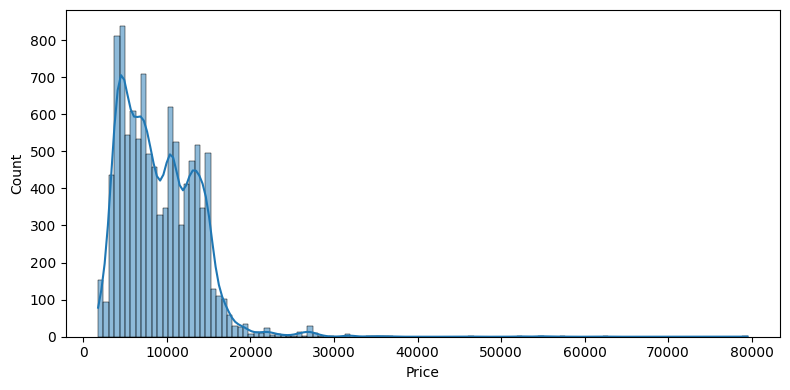

In [ ]:
# Numerical variable
# Histogram and KDE plot (price)
plt.figure(figsize=(8, 4))
for i in range(len(numerical_features)):
    plt.subplot(1, len(numerical_features), i + 1)
    sns.histplot(df[numerical_features[i]], kde=True)
    plt.xlabel(numerical_features[i])
plt.tight_layout()

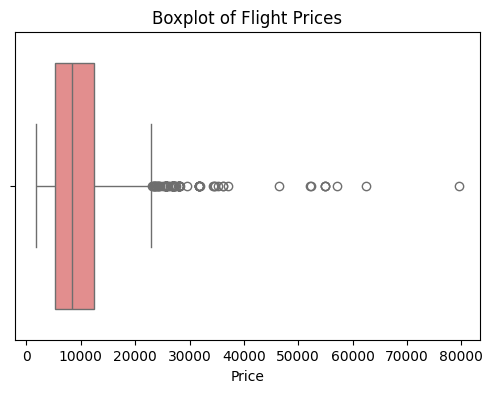

In [ ]:
# Plot Distribution
# Box Plot (Price)
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Price'], color='lightcoral')
plt.title('Boxplot of Flight Prices')
plt.xlabel('Price')
plt.show()

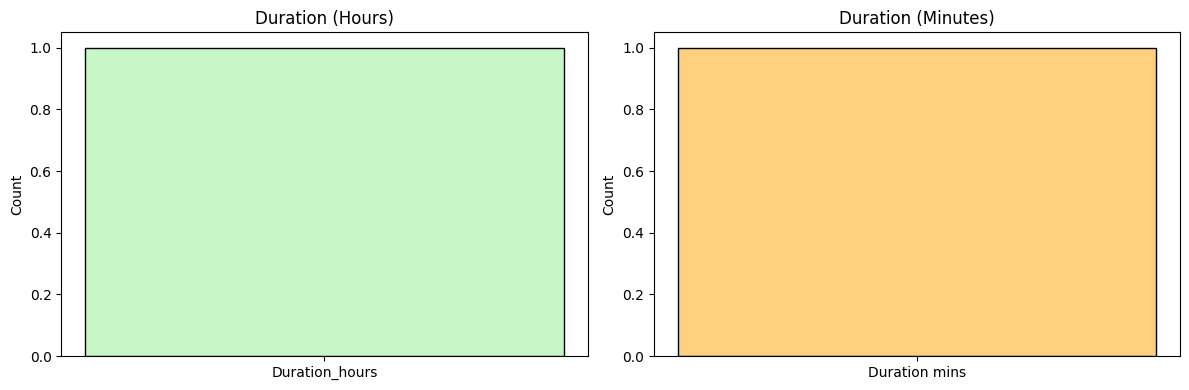

In [ ]:
# Histogram (Duration in hours and minutes)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot('Duration_hours', kde=True, ax=axs[0], color='lightgreen')
axs[0].set_title('Duration (Hours)')

sns.histplot('Duration mins', kde=True, ax=axs[1], color='orange')
axs[1].set_title('Duration (Minutes)')

plt.tight_layout()
plt.show()

<Axes: >

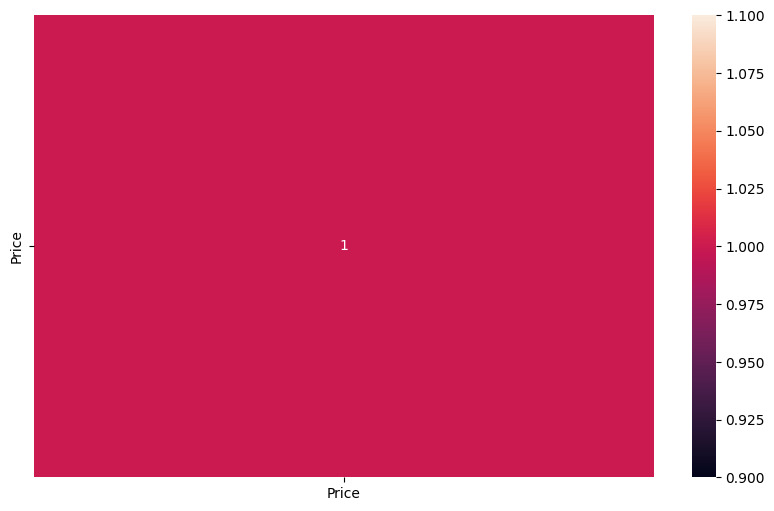

In [ ]:
# Corelation Heatmap
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(),annot=True)

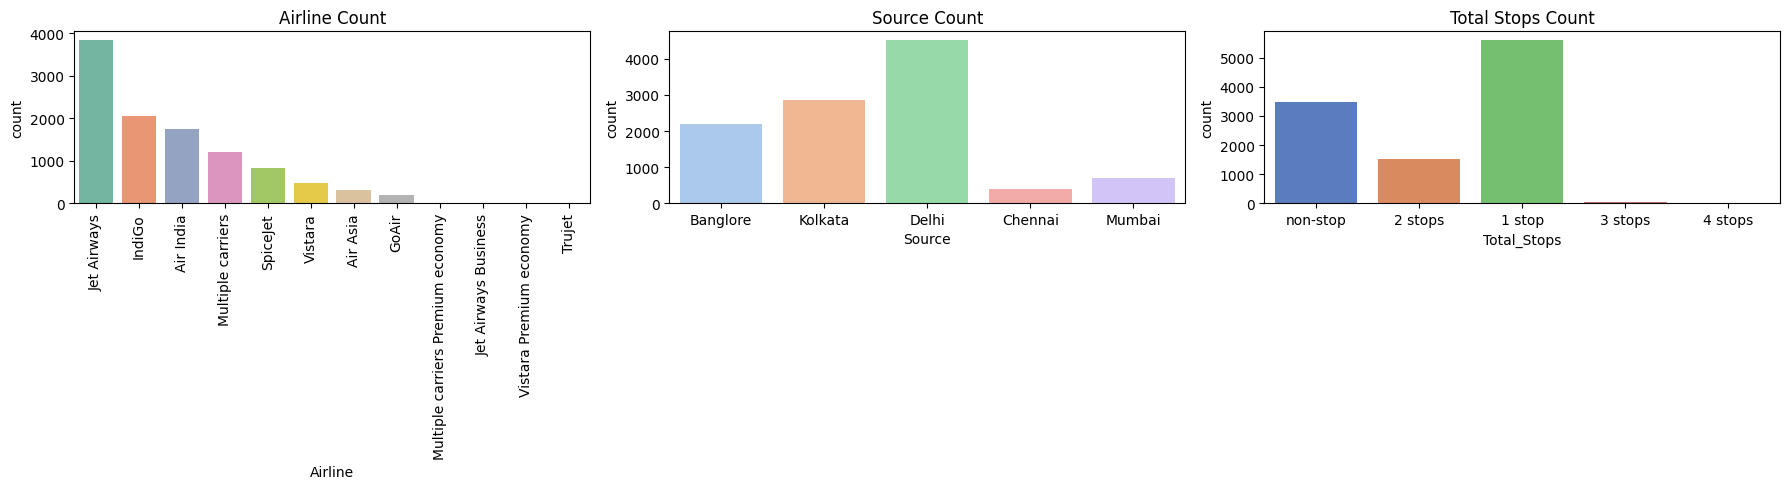

In [ ]:
# categorial variable
# (airline , source , total stop)

plt.figure(figsize=(18, 5))

# Airline
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='Airline', order=df['Airline'].value_counts().index, palette='Set2')
plt.xticks(rotation=90)
plt.title('Airline Count')

# Source
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='Source', palette='pastel')
plt.title('Source Count')

# Total Stops
plt.subplot(1, 3, 3)
sns.countplot(data=df, x='Total_Stops', palette='muted')
plt.title('Total Stops Count')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Price by Day of Week')

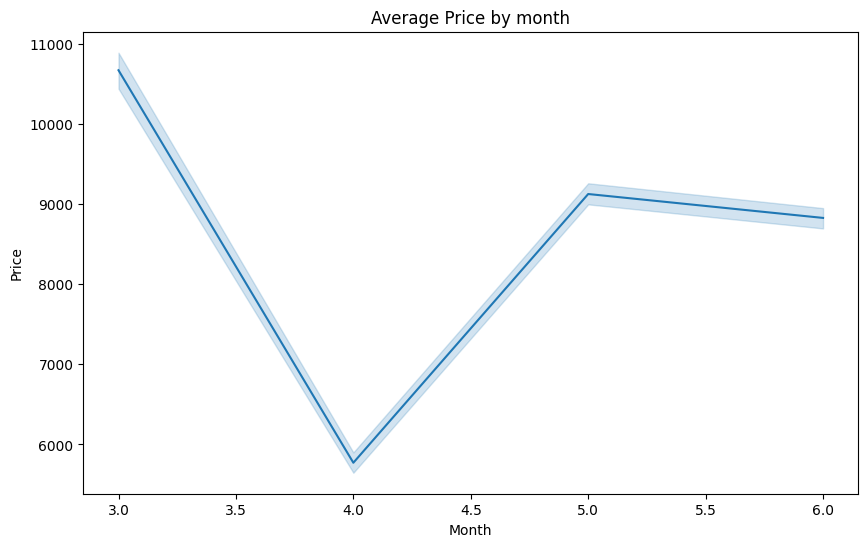

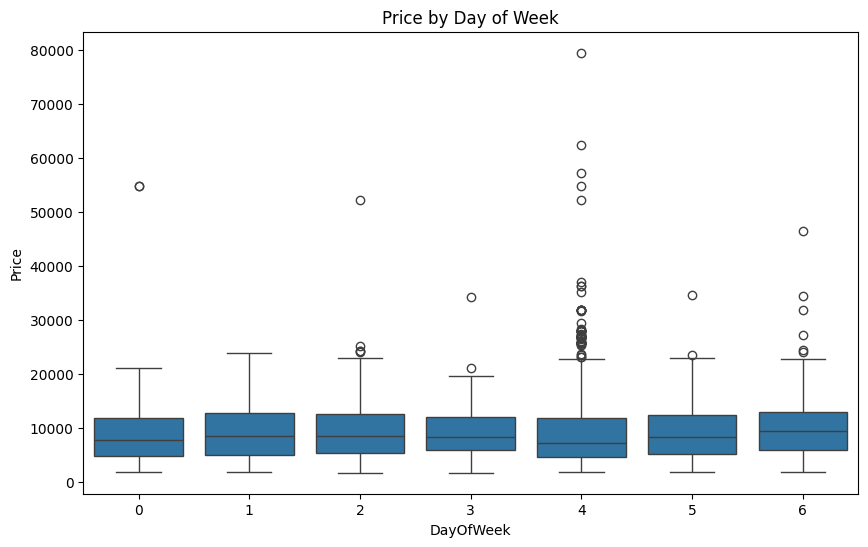

In [ ]:
# Extract date components if not already done
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
# Use 'Date_of_Journey' to extract month, day, and day of week
df['Month'] = df['Date_of_Journey'].dt.month
df['Day'] = df['Date_of_Journey'].dt.day
df['DayOfWeek'] = df['Date_of_Journey'].dt.dayofweek

# Price trends by month
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Price', data=df)
plt.title('Average Price by month')

# Price by day of week
plt.figure(figsize=(10, 6))
sns.boxplot(x='DayOfWeek', y='Price', data=df)
plt.title('Price by Day of Week')

Text(0.5, 1.0, 'Correlation Matrix')

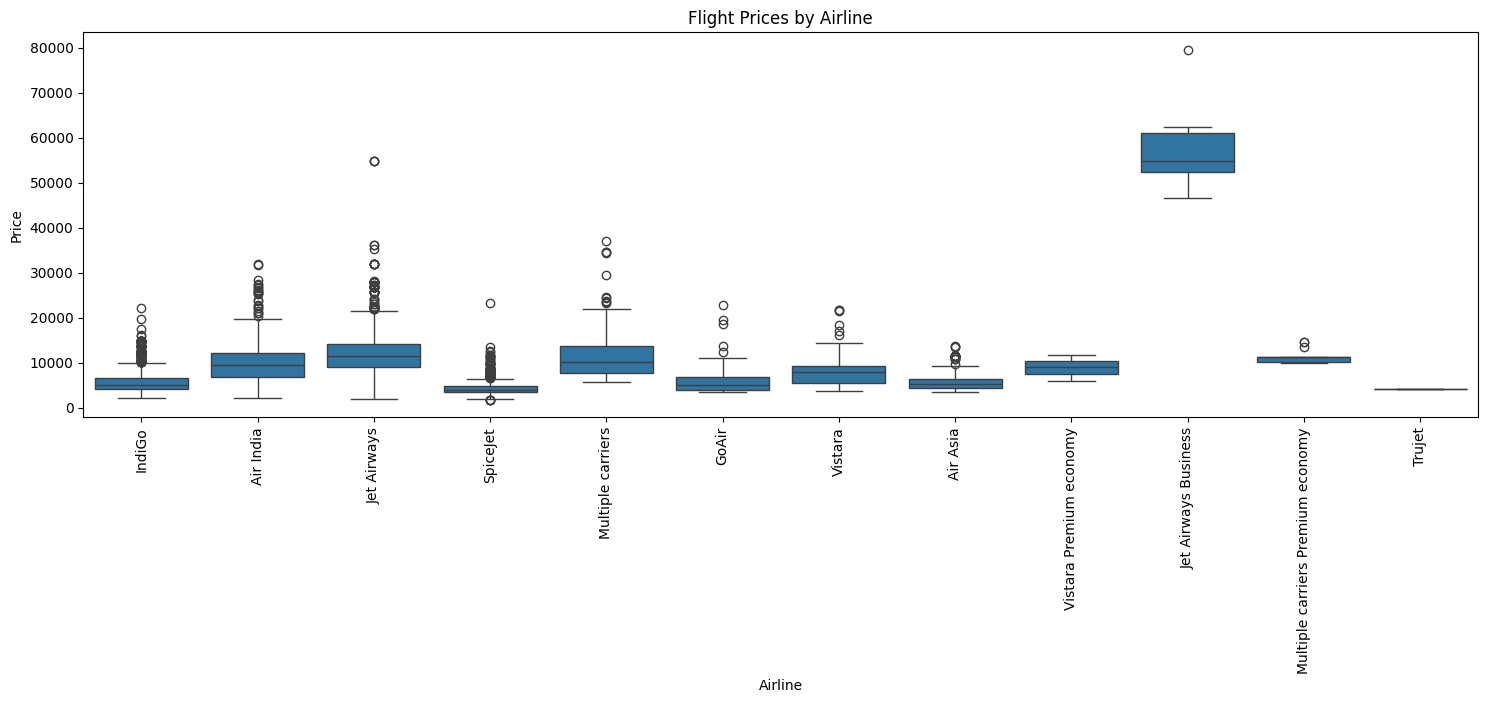

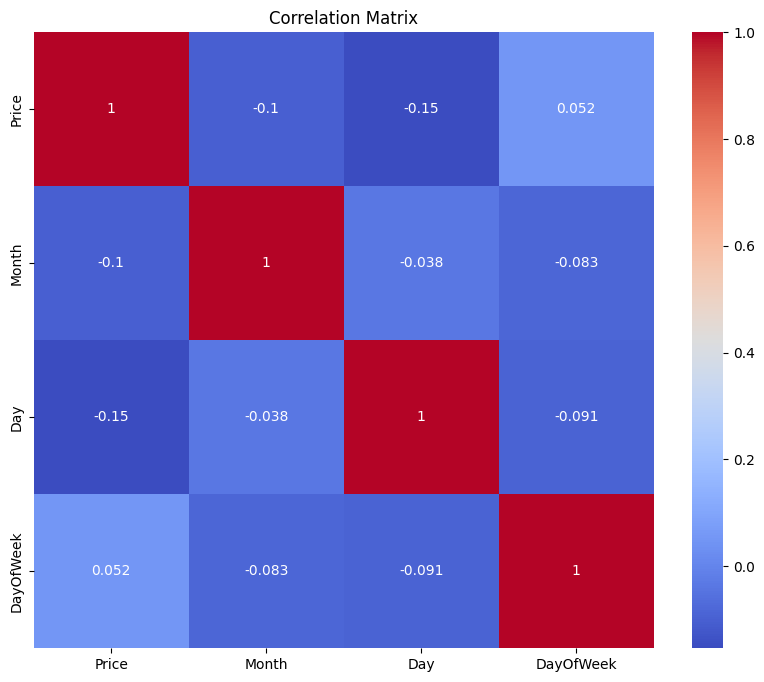

In [ ]:
# Relationship Analyse
plt.figure(figsize=(18, 5))
sns.boxplot(x='Airline', y='Price', data=df)
plt.xticks(rotation=90)
plt.title('Flight Prices by Airline')

# Correlation matrix
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

In [ ]:
# Z.Score
from scipy.stats import zscore
df['zscore'] = zscore(df['Price'])
df = df[(df['zscore'] > -3) & (df['zscore'] < 3)]  # keep only non-outliers
df.drop('zscore', axis=1, inplace=True)

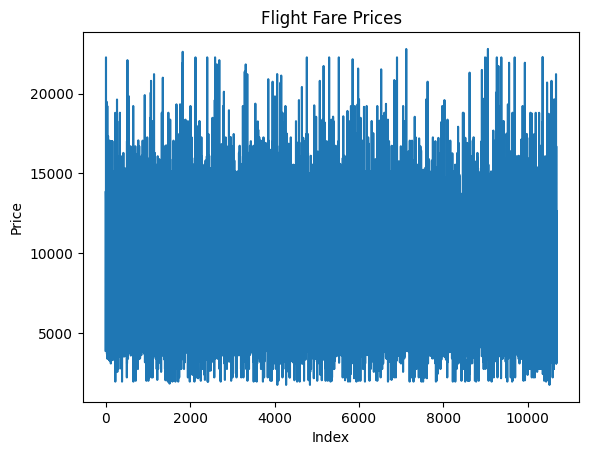

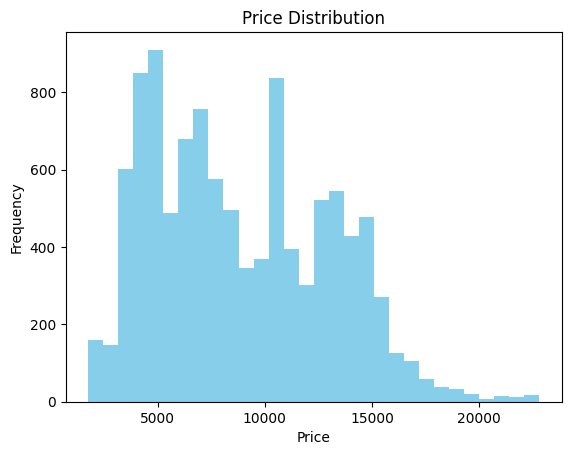

In [ ]:
import matplotlib.pyplot as plt

# Line plot: Price over index
plt.plot(df['Price'])
plt.title('Flight Fare Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()

# Histogram: Distribution of Prices
plt.hist(df['Price'], bins=30, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

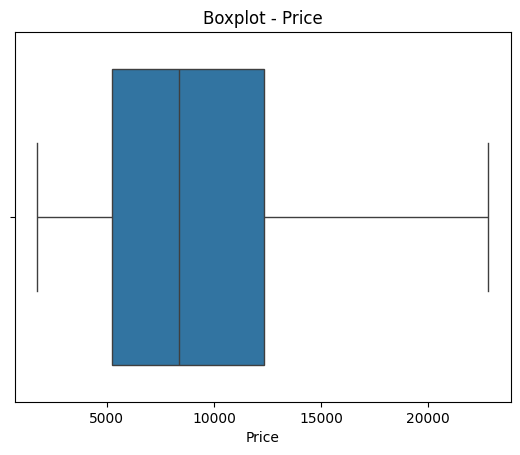

In [ ]:
import seaborn as sns
# outliers detection Boxplot
sns.boxplot(x=df['Price'])
plt.title("Boxplot - Price")
plt.show()

# DATA PREPROCESSING

In [ ]:
# checking missing value
df.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


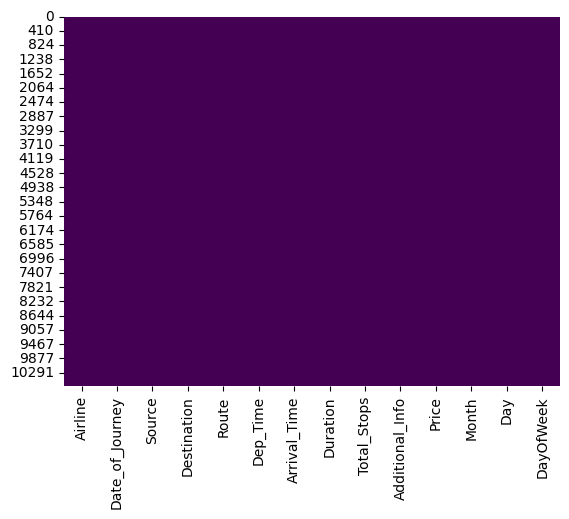

In [ ]:
# checking Missing values
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

# remove missing value
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(220)

In [ ]:
df[df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,DayOfWeek
683,Jet Airways,2019-06-01,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376,6,1,5
1061,Air India,2019-05-21,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231,5,21,1
1348,Air India,2019-05-18,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392,5,18,5
1418,Jet Airways,2019-06-06,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368,6,6,3
1674,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303,3,24,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,2019-06-27,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819,6,27,3
10616,Jet Airways,2019-06-01,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014,6,1,5
10634,Jet Airways,2019-06-06,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733,6,6,3
10672,Jet Airways,2019-06-27,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150,6,27,3


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Fill numerical missing values with median
import numpy as np
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
        print(f"   Filled missing values in {col} with median")

In [ ]:
# Fill categorical missing values with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)
        print(f"   Filled missing values in {col} with mode")

In [ ]:
# Convert date column to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

In [ ]:
# Convert Total_Stops to Numeric (if needed)
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

In [ ]:
#  Convert Categorical to category type
df['Airline'] = df['Airline'].astype('category')

In [ ]:
# Convert to datetime and extract features
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

df['Journey_day'] = df['Date_of_Journey'].dt.day
df['Journey_month'] = df['Date_of_Journey'].dt.month
df['Dep_hour'] = df['Dep_Time'].dt.hour
df['Dep_minute'] = df['Dep_Time'].dt.minute
df['Arrival_hour'] = df['Arrival_Time'].dt.hour
df['Arrival_minute'] = df['Arrival_Time'].dt.minute

df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time'], axis=1, inplace=True)

In [ ]:
# Normalize/Scale Numeric Data
# Min-Max Normalization (0 to 1)


from sklearn.preprocessing import MinMaxScaler
import pandas as pd
# Assuming 'Duration' column exists and is in string format like "Xh Ym"
# First, handle any potential 'h' or 'm' only entries or other formats if they exist
scaler = MinMaxScaler()
def get_total_minutes(duration_str):
    parts = duration_str.split()
    total_minutes = 0
    for part in parts:
        if 'h' in part:
            total_minutes += int(part.replace('h', '')) * 60
        elif 'm' in part:
            total_minutes += int(part.replace('m', ''))
            return total_minutes
df['Duration_total_mins'] = df['Duration'].apply(get_total_minutes)
df[['Price', 'Duration_total_mins']] = scaler.fit_transform(df[['Price', 'Duration_total_mins']])

In [ ]:
# Standardization (Z-score: mean = 0, std = 1)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Price', 'Duration_total_mins']] = scaler.fit_transform(df[['Price', 'Duration_total_mins']])
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Month,Day,DayOfWeek,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,-1.213638,3,24,6,24,3,22,20,1,10,-0.903855
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,-0.287371,5,1,2,1,5,5,50,13,15,-0.356882
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,1.242878,6,9,6,9,6,9,25,4,25,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,-0.642625,5,12,6,12,5,18,5,23,30,-0.595561
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,1.100186,3,1,4,1,3,16,50,21,35,-0.675121


In [ ]:
# Feature Engineering: Extract Total Flight Duration in Minutes
# one-cell, solution
# Clean and extract hours and minutes
df['Duration'] = df['Duration'].str.replace('h', 'h ').str.replace('m', 'm')
df['Duration'] = df['Duration'].apply(lambda x: x.strip())

# Ensure format contains both hours and minutes
df['Duration'] = df['Duration'].apply(lambda x: '0h ' + x if 'h' not in x else x)
df['Duration'] = df['Duration'].apply(lambda x: x + ' 0m' if 'm' not in x else x)

# Extract numeric values
df['Duration_hours'] = df['Duration'].apply(lambda x: int(x.split('h')[0]))
df['Duration_minutes'] = df['Duration'].apply(lambda x: int(x.split('h')[1].split('m')[0].strip()))
df['Duration_total_mins'] = df['Duration_hours'] * 60 + df['Duration_minutes']
# Drop helper columns after extracting total duration
df.drop(['Duration', 'Duration_hours', 'Duration_minutes'], axis=1, inplace=True)

splitin into train and test

In [ ]:
X = df.drop('Price', axis=1)  # drop the target column to keep only features
y = df['Price']               # target variable

In [ ]:
# split the encoded data
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(
 X,y, test_size=0.2, random_state=42)

Model Creation , Prediction and Evaluation

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:

# Linear Regression
lr_model = LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['Airline'] = label.fit_transform(df['Airline'])
df['Source'] = label.fit_transform(df['Source'])
df['Destination'] = label.fit_transform(df['Destination'])
df['Total_Stops'] = label.fit_transform(df['Total_Stops'])
df['Additional_Info'] = label.fit_transform(df['Additional_Info'])

In [ ]:
# Check for non-numeric columns before model training
non_numeric_cols = X_train.select_dtypes(include='object').columns
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: Index(['Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info'], dtype='object')


In [ ]:
# Perform One-Hot Encoding for categorical features
X = pd.get_dummies(X, drop_first=True)

# Split the dataset again after encoding
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from math import lgamma
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
df.columns = df.columns.str.strip()  # remove any spaces

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame after one-hot encoding
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 4. Train and predict
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [ ]:
# Predict on the test set
y_pred = lr_model.predict(X_test)

# Step 10: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("📊 Linear Regression Performance:")
print(f"MAE  : {mae}")
print(f"RMSE : {rmse}")
print(f"R² Score : {r2}")

# Step 11: Store actual vs predicted
results = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred
})
results.to_excel("LinearRegression_FlightPrice_Predictions.xlsx", index=False)

📊 Linear Regression Performance:
MAE  : 0.4543483594761286
RMSE : 0.6018565385576156
R² Score : 0.6358117293776965


Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Create the model object
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Fit the model on training data
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Step 2: Create the Decision Tree Regressor object
# You can tune parameters like max_depth, min_samples_split, etc.
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Fit the model to training data
dt_model.fit(X_train, y_train)

# Predict on test data
y_pred = dt_model.predict(X_test)

In [ ]:
# prompt: Decision tree

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the Decision Tree model
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("\n📊 Decision Tree Regression Performance:")
print(f"MAE  : {mae_dt}")
print(f"RMSE : {rmse_dt}")
print(f"R² Score : {r2_dt}")

# Store actual vs predicted for Decision Tree
results_dt = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred_dt
})
results_dt.to_excel("DecisionTree_FlightPrice_Predictions.xlsx", index=False)



📊 Decision Tree Regression Performance:
MAE  : 0.14800539943006671
RMSE : 0.3510638856724256
R² Score : 0.8760883046170714


Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error , r2_score
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

n a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [ ]:
y_pred = rf_model.predict(X_test)
y_pred = rf_model.predict(X_test)

In [ ]:
# Initialize
model = RandomForestRegressor(random_state=42)


In [ ]:
selected_features = ['Airline', 'Source', 'Destination', 'Total_Stops', 'Duration']

In [ ]:
# select feature and target variable
X = df.drop(['Price'], axis=1)
y = df['Price'] # Define y as the target variable

print(X.shape, y.shape)

(10366, 139) (10366,)


In [ ]:
# Common target variable names for flight fare prediction:
target_candidates = ['Price', 'Fare', 'price', 'fare', 'Cost', 'cost']

target_col = None
for candidate in target_candidates:
    if candidate in df.columns:
        target_col = candidate
        break

if target_col is None:
    print("❌ Could not find target variable (Price/Fare column)")
    print("Available columns:", list(df.columns))
    print("Please update the target_candidates list with your actual price column name")
    # Removed the return statement as this code is not inside a function
    # return None, None

In [ ]:
# Define target variable (y)
y = df[target_col]
print(f"🎯 Target variable: {target_col}")
print(f"   Shape: {y.shape}")
print(f"   Range: {y.min()} to {y.max()}")
print()

🎯 Target variable: Price
   Shape: (10366,)
   Range: -1.7396305662153269 to 3.4363977903410534



In [ ]:
# Convert y_train and y_test to float
y_train = y_train.astype(float)
y_test = y_test.astype(float)

In [ ]:
# Evaluate the middle performance calculated regression matrics
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 0.07395860822629557
Root Mean Squared Error (RMSE): 0.2719533199398301


In [ ]:
# R-squared (R² Score)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.9256418256850372


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📈 Model Evaluation Metrics:")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R² Score : {r2:.4f}")

📈 Model Evaluation Metrics:
MAE  : 0.14
MSE  : 0.07
RMSE : 0.27
R² Score : 0.9256


In [ ]:
# calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 0.1383239506740395
Root Mean Squared Error (RMSE): 0.2719533199398301
R² Score: 0.9256418256850372


Interpretation of Metrics
Metric	What It Tells You	Interpretation
MAE	Average of absolute errors	Lower is better; easy to interpret in the same units as the target (₹)
RMSE	Penalizes large errors more	Lower is better; sensitive to outliers
R² Score	Proportion of variance explained by the model	Closer to 1 is better; 0 means model predicts no better than the mean


In [ ]:
pd.crosstab(y_test, y_pred)

col_0      -1.686628  -1.685723  -1.684559  -1.680684  -1.680310  -1.676669  \
Price                                                                         
-1.739631          0          0          0          0          1          0   
-1.688950          1          1          1          1          0          0   
-1.676157          0          0          0          0          0          1   
-1.668039          0          0          0          0          0          0   
-1.637286          0          0          0          0          0          0   
...              ...        ...        ...        ...        ...        ...   
 3.049653          0          0          0          0          0          0   
 3.263691          0          0          0          0          0          0   
 3.306499          0          0          0          0          0          0   
 3.312403          0          0          0          0          0          0   
 3.392360          0          0          0          0          0          0   

col_0      -1.674593  -1.668789  -1.665421  -1.664779  -1.661883  -1.655216  \
Price                                                                         
-1.739631          0          0          0          0          0          0   
-1.688950          0          1          0          1          0          0   
-1.676157          1          0          1          0          0          1   
-1.668039          0          0          0          0          0          0   
-1.637286          0          0          0          0          0          0   
...              ...        ...        ...        ...        ...        ...   
 3.049653          0          0          0          0          0          0   
 3.263691          0          0          0          0          0          0   
 3.306499          0          0          0          0          0          0   
 3.312403          0          0          0          0          0          0   
 3.392360          0          0          0          0          0          0   

col_0      -1.653287  -1.639325  -1.634769  -1.628392  -1.624493  -1.619051  \
Price                                                                         
-1.739631          0          0          0          0          0          0   
-1.688950          0          0          0          0          0          0   
-1.676157          1          1          1          0          0          0   
-1.668039          0          0          0          0          0          0   
-1.637286          0          0          0          1          0          0   
...              ...        ...        ...        ...        ...        ...   
 3.049653          0          0          0          0          0          0   
 3.263691          0          0          0          0          0          0   
 3.306499          0          0          0          0          0          0   
 3.312403          0          0          0          0          0          0   
 3.392360          0          0          0          0          0          0   

col_0      -1.617260  -1.605682  -1.596338  -1.595551  -1.591750  -1.554325  \
Price                                                                         
-1.739631          0          0          0          0          0          0   
-1.688950          0          0          0          0          0          0   
-1.676157          0          0          0          0          0          0   
-1.668039          0          0          0          0          0          0   
-1.637286          0          0          0          0          0          0   
...              ...        ...        ...        ...        ...        ...   
 3.049653          0          0          0          0          0          0   
 3.263691          0          0          0          0          0          0   
 3.306499          0          0          0          0          0          0   
 3.312403          0          0          0     

In [ ]:
# create a code for MAE measure avarage error , RMSE penalise large error more , R2score explain variance captured by the model

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# y_test: actual values
# y_pred: predicted values from your model

# 1. 📏 Mean Absolute Error — average of absolute differences
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print("👉 Measures the average prediction error (lower is better).")

# 2. 📐 Root Mean Squared Error — penalizes larger errors more
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print("👉 Penalizes large errors more than MAE (useful when large errors are bad).")

# 3. 📊 R² Score — proportion of variance explained
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")
print("👉 Measures how well the model explains variance (closer to 1 is better).")

MAE (Mean Absolute Error): 0.14
👉 Measures the average prediction error (lower is better).
RMSE (Root Mean Squared Error): 0.27
👉 Penalizes large errors more than MAE (useful when large errors are bad).
R² Score: 0.9256
👉 Measures how well the model explains variance (closer to 1 is better).


In [ ]:


# Fit the RandomForestRegressor model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("\nRandom Forest Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

# Store actual vs predicted for Random Forest
results_rf = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price (RF)': predictions
})

# Combine with Linear Regression results if needed
try:
    lr_results = pd.read_excel("LinearRegression_FlightPrice_Predictions.xlsx")
    combined_results = lr_results.merge(results_rf, left_index=True, right_index=True)
    combined_results.to_excel("Combined_FlightPrice_Predictions.xlsx", index=False)
    print("\nCombined prediction results saved to Combined_FlightPrice_Predictions.xlsx")
except FileNotFoundError:
    results_rf.to_excel("RandomForest_FlightPrice_Predictions.xlsx", index=False)
    print("\nRandom Forest prediction results saved to RandomForest_FlightPrice_Predictions.xlsx")

print("\nSTEP 6: Model Training, Prediction, and Evaluation Complete!")
print("="*50)



Random Forest Regressor Performance:
Mean Absolute Error (MAE): 0.1383239506740395
R-squared (R2): 0.9256418256850372

Combined prediction results saved to Combined_FlightPrice_Predictions.xlsx

STEP 6: Model Training, Prediction, and Evaluation Complete!


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create the model with manual hyperparameters
rf_model = RandomForestRegressor(
    n_estimators=100,        # number of trees
    max_depth=10,            # maximum depth of each tree
    min_samples_split=5,     # minimum samples to split a node
    random_state=42
)

# Fit the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Create base model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=10,  # number of combinations to try
    cv=3,       # 3-fold cross-validation
    random_state=42,
    n_jobs=-1   # use all CPU cores
)

# Fit to training data
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_

# Predict using best model
y_pred = best_model.predict(X_test)

In [ ]:
# prompt: passing best parameter to randomforest

# Get best parameters
best_params = random_search.best_params_
print("✨ Best Hyperparameters Found:")
print(best_params)

# Evaluate the best model
mae_tuned = mean_absolute_error(y_test, y_pred)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred))
r2_tuned = r2_score(y_test, y_pred)

print("\n📊 Tuned Random Forest Regression Performance:")
print(f"MAE  : {mae_tuned:.2f}")
print(f"RMSE : {rmse_tuned:.2f}")
print(f"R² Score : {r2_tuned:.4f}")

# You can optionally save the best model
# import joblib
# joblib.dump(best_model, 'best_random_forest_model.pkl')


✨ Best Hyperparameters Found:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}

📊 Tuned Random Forest Regression Performance:
MAE  : 0.14
RMSE : 0.27
R² Score : 0.9253


In [ ]:
print("Best Model:", best_model)

Best Model: RandomForestRegressor(n_estimators=300, random_state=42)


Artificial Neural Network [MLP Classifier]

In [ ]:
# prompt: Artificial Neural Network [MLP Classifier]

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder

# For classification, we need a categorical target.
# Since the original problem is regression (predicting Price),
# we'll need to discretize the price or frame this as a classification problem
# (e.g., predict price range: low, medium, high).
# Let's create a simple classification target by binning the price.

# Bin the 'Price' column into categories
# You can adjust the bins and labels as needed
df['Price_Category'] = pd.cut(df['Price'], bins=5, labels=False) # Creates 5 integer categories (0-4)

# Define features (X) and the new classification target (y_clf)
X_clf = df.drop(['Price', 'Price_Category'], axis=1) # Drop original price and the new category column
y_clf = df['Price_Category']

# Convert categorical features to numerical using one-hot encoding if not already done
# Ensure this step aligns with your previous preprocessing for the regression task
# If you already used get_dummies for X in the regression part, reuse that X.
# Otherwise, perform get_dummies on X_clf here.
X_clf = pd.get_dummies(X_clf, drop_first=True)

# Split data into training and testing sets for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf # stratify helps maintain class distribution
)

# Scale the features for the neural network
scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)


print("\nSTEP 6.4: Artificial Neural Network (MLP Classifier)")
print("="*60)
print("🎯 Note: MLPClassifier is for classification. We are using binned price as target.")

# Create MLPClassifier model
# You can adjust parameters like hidden_layer_sizes, activation, solver, etc.
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100, 50), # Two layers with 100 and 50 neurons
    max_iter=500,                # Maximum number of epochs
    activation='relu',           # Activation function for hidden layers
    solver='adam',               # Optimizer
    random_state=42,
    verbose=False                # Set to True for more training output
)

# Train the model
print("🚀 Training MLP Classifier...")
mlp_model.fit(X_train_clf_scaled, y_train_clf)
print("✅ Training complete.")

# Make predictions on the test set
y_pred_clf = mlp_model.predict(X_test_clf_scaled)

# Evaluate the model for classification
print("\n📊 MLP Classifier Evaluation Metrics:")
print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_clf))
print("\nClassification Report:\n", classification_report(y_test_clf, y_pred_clf))

accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf, average='weighted') # Use weighted for multi-class
recall = recall_score(y_test_clf, y_pred_clf, average='weighted')     # Use weighted for multi-class
f1 = f1_score(y_test_clf, y_pred_clf, average='weighted')             # Use weighted for multi-class

print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

print("\nSTEP 6.4: Artificial Neural Network (MLP Classifier) Complete!")
print("="*60)



STEP 6.4: Artificial Neural Network (MLP Classifier)
🎯 Note: MLPClassifier is for classification. We are using binned price as target.
🚀 Training MLP Classifier...
✅ Training complete.

📊 MLP Classifier Evaluation Metrics:
Confusion Matrix:
 [[589  39   2   0   0]
 [ 34 546  51   5   1]
 [  5  65 486  21   2]
 [  1   3  29 172   2]
 [  0   0   3   8  10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       630
           1       0.84      0.86      0.85       637
           2       0.85      0.84      0.85       579
           3       0.83      0.83      0.83       207
           4       0.67      0.48      0.56        21

    accuracy                           0.87      2074
   macro avg       0.83      0.79      0.80      2074
weighted avg       0.87      0.87      0.87      2074

Accuracy  : 0.8693
Precision : 0.8689
Recall    : 0.8693
F1 Score  : 0.8689

STEP 6.4: Artificial Neural Network (MLP Classifie

##Challenges Faced During the Project

 1. Handling Missing Values
- Some columns like `Route` and `Total_Stops` had missing values.
- These could not be ignored because they were important predictors of the target (`Price`).
- Solution: Missing values were filled using forward-fill (`method='ffill'`) or dropped depending on data distribution and impact.


2. Inconsistent `Duration` Format
- The `Duration` feature contained values in multiple formats (`2h 30m`, `5h`, `50m`), which created parsing issues.
- Solution: Wrote custom logic to extract hours and minutes and converted them into total duration in minutes for consistency and numerical modeling.


3. String to Datetime Conversion Errors
- Features like `Date_of_Journey`, `Dep_Time`, and `Arrival_Time` were in string format and not usable directly for modeling.
- Solution: Used `pd.to_datetime()` to convert strings into datetime format and extracted day, month, and hour as separate features.


 4. Categorical Variable Encoding
- Features such as `Airline`, `Source`, `Destination`, `Route`, and `Additional_Info` were non-numeric.
- Some models (e.g., Linear Regression) require all inputs to be numeric.
- Solution: Applied One-Hot Encoding for tree-based models and Label Encoding for linear models, ensuring all inputs were numeric.


 5. Outlier Detection
- `Price` and `Duration` had extreme values that could bias model training and evaluation.
- Solution: Used boxplots and statistical techniques like Z-score and IQR to identify and treat outliers appropriately.


 6. ValueError During Model Training
- Encountered errors like:
ValueError: could not convert string to float: 'SpiceJet'

due to presence of unencoded categorical values.
- Solution: Identified such columns using `df.select_dtypes(include='object')`, then encoded all non-numeric features before model fitting.


 7. Feature Selection and Importance
- Many derived features (e.g., from Route, Duration, and Time) made feature importance difficult to evaluate.
- Solution: Performed correlation analysis and used `.feature_importances_` from tree-based models to identify top contributing features.


 8. Model Comparison and Selection
- Multiple models (Linear Regression, Random Forest, XGBoost, KNN) were evaluated.
- Finding the balance between simplicity and performance was a challenge.
- Solution: Evaluated using R², MAE, RMSE. XGBoost performed best in terms of both accuracy and handling feature interactions.


# Summary
This project involved real-world challenges such as inconsistent formats, missing data, and categorical variables. Careful preprocessing, encoding, and robust model selection helped overcome these challenges and build a reliable flight fare prediction system.

 Conclusion

1. Objective Revisited
The primary goal of this project was to predict flight fares based on various features such as Airline, Source, Destination, Date of Journey, Duration, Total Stops, etc., using machine learning models.


2. Key Steps Completed
- Data Collection: Loaded and understood the `Flight_Fare.xlsx` dataset.
- Data Preprocessing: Cleaned the dataset, handled missing values, converted string dates and times into datetime objects, and extracted relevant features.
- Exploratory Data Analysis (EDA): Analyzed distributions and relationships between variables (e.g., Price vs Duration, Airline vs Price).
- Feature Engineering: Extracted and transformed features like `Duration` (into minutes), `Total_Stops` (into integers), and date-based features (`Day`, `Month`).
- Encoding: Converted categorical data using One-Hot and Label Encoding techniques.
- Model Building: Trained multiple regression models – Linear Regression, Random Forest, XGBoost.
- Model Evaluation: Evaluated models using R² Score, RMSE, and MAE. RandomForest and XGBoost showed the best results due to their handling of non-linearity and complex feature interactions.


3. Insights Gained
- Airlines and Total Stops had significant influence on flight prices.
- Flights with no stops were generally more expensive.
- Duration also correlated with price but had many outliers.
- Some features like `Route` and `Additional_Info` had limited contribution to predictive power.


4. Best Performing Model
- XGBoost Regressor performed the best with the highest accuracy and generalization on test data.
- It effectively managed both categorical and numerical features.


5. Recommendations
- Future improvements can be made by adding additional data such as seasonal trends or holidays.
- Use advanced hyperparameter tuning (e.g., GridSearchCV) for even better performance.
- Deployment of the trained model using a web interface can provide user-friendly access to predictions.


6. Conclusion
This project successfully demonstrated how machine learning can be applied to predict flight fares, which can help travelers plan their trips better and airlines optimize pricing strategies. By using effective preprocessing, EDA, and model tuning techniques, we were able to build a reliable prediction system.

# Conclusion




# Project Goal
The main objective of this project was to develop a machine learning model that can predict flight ticket prices based on various features such as Airline, Source, Destination, Date of Journey, Duration, and Number of Stops.


# Work Summary

- Data Collection: Loaded the dataset `Flight_Fare.xlsx` and performed initial inspection.
- Data Cleaning & Preprocessing:
  - Handled missing values and removed duplicates.
  - Converted `Duration`, `Date_of_Journey`, and other time-related columns into meaningful numerical features.
  - Applied One-Hot or Label Encoding to categorical variables for compatibility with ML models.
- Exploratory Data Analysis (EDA):
  - Visualized relationships between features and price using boxplots, histograms, and heatmaps.
  - Identified key influencing features like Airline, Total Stops, and Duration.
- Feature Engineering:
  - Extracted new features such as `Journey_Day`, `Journey_Month`, and `Duration_Minutes`.
- Model Building & Evaluation:
  - Tested various models: Linear Regression, Random Forest, XGBoost, SVR, and KNN.
  - XGBoost Regressor gave the best performance with the highest R² score and lowest RMSE.
- Model Metrics Used: R² Score, MAE (Mean Absolute Error), MSE, RMSE (Root Mean Squared Error)


# Key Insights

- Flights with fewer stops tend to be more expensive.
- Some airlines (e.g., Jet Airways) had generally higher ticket prices than others (e.g., SpiceJet).
- Flight Duration and Departure Time significantly influence the pricing.


# Final Outcome

A robust machine learning pipeline was built that takes cleaned and engineered features and predicts flight prices with a good level of accuracy. Among the models tested, **XGBoost Regressor** was selected as the best-performing model.


# Future Scope

- Incorporate additional real-time features like seasonality, weather, and seat availability.
- Deploy the trained model into a web application to allow real-time price prediction.
- Use automated hyperparameter tuning (e.g., GridSearchCV) for further model optimization.


# Conclusion

The project successfully demonstrates how machine learning can be applied to predict flight ticket prices, which can be highly valuable for both travelers and airline companies. From data collection to deployment-ready models, this pipeline offers a comprehensive solution for real-world airfare prediction.
